In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step








In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [0]:
conv_base.trainable = False

In [0]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [0]:
import os
base_path = 'drive/My Drive/datasets/dc_dataset'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')

In [0]:
%%time
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), batch_size=32, class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=(150, 150), batch_size=32, class_mode='binary')


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_vgg16_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 989s 10s/step - loss: 0.7174 - acc: 0.5666 - val_loss: 0.5711 - val_acc: 0.7938
Epoch 2/30
100/100 [==============================] - 53s 535ms/step - loss: 0.5775 - acc: 0.7066 - val_loss: 0.4086 - val_acc: 0.7893
Epoch 3/30
100/100 [==============================] - 53s 532ms/step - loss: 0.4527 - acc: 0.8009 - val_loss: 0.4381 - val_acc: 0.7766
Epoch 4/30
100/100 [==============================] - 54s 540ms/step - loss: 0.3856 - acc: 0.8331 - val_loss: 0.2361 - val_acc: 0.9001
Epoch 5/30
100/100 [==============================] - 53s 532ms/step - loss: 0.3521 - acc: 0.8547 - val_loss: 0.2710 - val_acc: 0.9048
Epoch 6/30
100/100 [==============================] - 54s 542ms/step - loss: 0.2865 - acc: 0.8853 - val_loss: 0.2060 - val_acc: 0.9182
Epoch 7/30
100/100 [==============================] - 54s 538ms/step - loss: 0.2528 - acc: 0.9072 - val_los

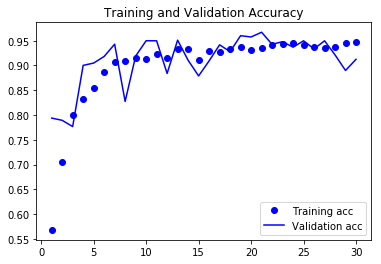

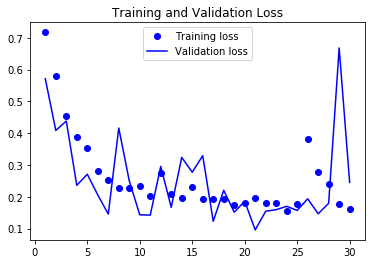

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Fine tunning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
%%time
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), batch_size=32, class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=(150, 150), batch_size=32, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_vgg16_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30
100/100 [==============================] - 1283s 13s/step - loss: 0.4831 - acc: 0.7766 - val_loss: 0.3646 - val_acc: 0.8668
Epoch 2/30
100/100 [==============================] - 41s 413ms/step - loss: 0.3215 - acc: 0.8653 - val_loss: 0.1730 - val_acc: 0.9253
Epoch 3/30
100/100 [==============================] - 41s 410ms/step - loss: 0.2551 - acc: 0.8928 - val_loss: 0.4569 - val_acc: 0.8338
Epoch 4/30
100/100 [==============================] - 42s 417ms/step - loss: 0.2281 - acc: 0.9138 - val_loss: 0.1570 - val_acc: 0.9323
Epoch 5/30
100/100 [==============================] - 40s 401ms/step - loss: 0.1949 - acc: 0.9219 - val_loss: 0.3535 - val_acc: 0.8807
Epoch 6/30
100/100 [==============================] - 44s 438ms/step - loss: 0.1893 - acc: 0.9266 - val_loss: 0.1464 - val_acc: 0.9375
Epoch 7/30
100/100 [==============================] - 41s 413ms/step - loss: 0.1697 - acc: 0.9303 - val_

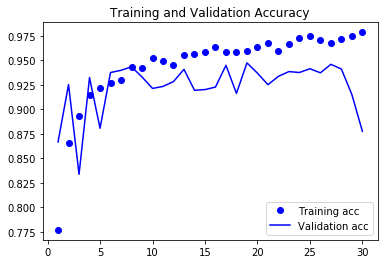

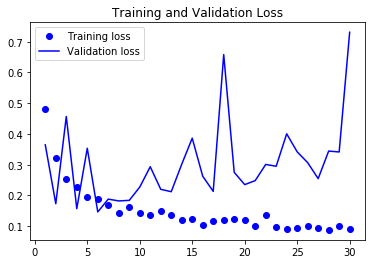

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()